In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using automap_base()
Base = automap_base()

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

'2017-08-23'

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
date=session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first().date
date

'2017-08-23'

In [12]:
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_last=dt.datetime.strptime(date,'%Y-%m-%d')-dt.timedelta(days=365)
year_last


datetime.datetime(2016, 8, 23, 0, 0)

In [13]:
# Perform a query to retrieve the data and precipitation scores
prcp_score=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=year_last).\
    order_by(Measurement.date).all()
prcp_score

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(prcp_score)
prcp_df.columns=["Date","Precipitation"]
prcp_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [15]:
#fill none values
prcp_df=prcp_df.fillna(0)

In [16]:
# Sort the dataframe by date
dataframe_sorted=prcp_df.sort_values(by="Date")


In [17]:
dataframe_sorted.set_index("Date")

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


Text(0, 0.5, 'Inches')

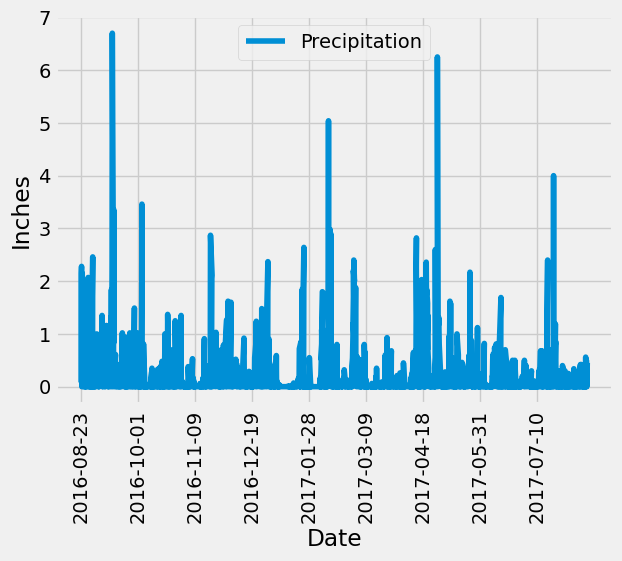

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
dataframe_sorted.plot().get_figure()
x_label=[0,250,500,750,1000,1250,1500,1750,2000]
x_ticks=["2016-08-23","2016-10-01","2016-11-09","2016-12-19","2017-01-28","2017-03-09","2017-04-18","2017-05-31","2017-07-10"]
plt.xticks(x_label,x_ticks,rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
dataframe_sorted.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
Number_station=session.query(Station).count()
print(f"There are {Number_station} stations in the dataset")

There are 9 stations in the dataset


In [21]:
locations=session.query(Station)

In [22]:
#list of stations in descending order
most_active_station=session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
#Reference github.com/karikshah
most_active_station_name=""
active_station=most_active_station[0][0]
for location in locations:
    if(location.station==most_active_station[0][0]):
        most_active_station_name=location.name
print(most_active_station_name)

WAIHEE 837.5, HI US


In [24]:
# consolidated results: 
print("Most Active Station information")
print(f"Name: {most_active_station_name}")
print(f"ID: {most_active_station[0][0]}")
print(f"count: {most_active_station[0][1]}")
print("List of station in Descending order")
print("Station       count")
print("------------------------")
for most_active_station in most_active_station:
    print(most_active_station[0],"  ",most_active_station[1])

Most Active Station information
Name: WAIHEE 837.5, HI US
ID: USC00519281
count: 2772
List of station in Descending order
Station       count
------------------------
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838    511


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Temperature=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
#Detailed results 
print(f"Minimum Temperature of Most Active station:{Temperature[0][0]}")
print(f"Maximum Temperature of Most Active station:{Temperature[0][1]}")
print(f"Average Temperature of Most Active station:{Temperature[0][2]}")

Minimum Temperature of Most Active station:54.0
Maximum Temperature of Most Active station:85.0
Average Temperature of Most Active station:71.66378066378067


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_station=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date>=year_last).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
temp_station

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [27]:
temp_df=pd.DataFrame(temp_station)
temp_df.columns=["Date","Temperature"]
temp_df

,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


In [28]:
temp_df.fillna(0)

,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


In [29]:
temp_df=temp_df.set_index("Date")

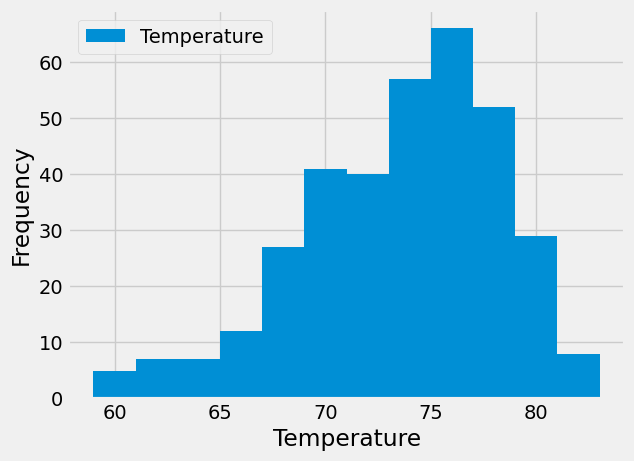

In [30]:
plt.hist(temp_df["Temperature"],12,label="Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [31]:
# Close Session
session.close()